In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
from run import getHourlyGen, getHourlyLoad

In [2]:
dfHourlyLoad = getHourlyLoad(ISO='ISNE', verbose=False)
dfHourlySolar, dfHourlyWind = getHourlyGen(ISO='ISNE', verbose=False)

In [3]:
load = dfHourlyLoad['Total Load'].loc[:23]
dailyGen = 232803
sum(load), dailyGen, dailyGen - sum(load)

(273147.35000000003, 232803, -40344.350000000035)

In [4]:
df = pd.read_csv('data/genfuelmix_20230101.csv', skiprows=1)
df.drop('H', inplace=True, axis=1)
df.drop('Marginal Flag', inplace=True, axis=1)
df.drop('Fuel Category Rollup', inplace=True, axis=1)
df.dropna(inplace=True, axis=0)
feulCategory = df['Fuel Category'].unique()
feulCategory.sort()
print(feulCategory)
dfHourly = pd.DataFrame()
date = df['Date'].iloc[0]
j=0
for i in range(len(df)):
    if j == i:
        time = df['Time'].iloc[i]
        slice = df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)]
        for fuel in feulCategory:
            if fuel not in slice['Fuel Category'].values:
                entry = {'Date': date, 'Time': time, 'Fuel Category': fuel, 'Gen Mw': 0.0}
                slice.loc[len(slice.index)] = entry
        slice = slice.sort_values('Fuel Category')
        if dfHourly.empty:
            dfHourly = slice
        else:
            dfHourly = pd.concat([dfHourly, slice], axis=0)
        dfHourly.reset_index(drop=True, inplace=True)
        
        print(df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)].index, time)
        j = df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)].index[-1] + 1
        print(j)


dfHourly
dfHourly.to_csv('data/genfuelmix_20230101_hourly_FIXED.csv', index=False)
    

['Coal' 'Hydro' 'Landfill Gas' 'Natural Gas' 'Nuclear' 'Oil' 'Other'
 'Refuse' 'Solar' 'Wind' 'Wood']
Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64') 00:01:47
8
Int64Index([8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64') 00:12:37
17
Int64Index([17, 18, 19, 20, 21, 22, 23, 24], dtype='int64') 00:23:32
25
Int64Index([25, 26, 27, 28, 29, 30, 31, 32, 33], dtype='int64') 00:30:46
34
Int64Index([34, 35, 36, 37, 38, 39, 40, 41, 42], dtype='int64') 00:38:39
43
Int64Index([43, 44, 45, 46, 47, 48, 49, 50], dtype='int64') 00:48:48
51
Int64Index([51, 52, 53, 54, 55, 56, 57, 58], dtype='int64') 00:55:49
59
Int64Index([59, 60, 61, 62, 63, 64, 65, 66, 67], dtype='int64') 01:04:09
68
Int64Index([68, 69, 70, 71, 72, 73, 74, 75, 76], dtype='int64') 01:07:55
77
Int64Index([77, 78, 79, 80, 81, 82, 83, 84], dtype='int64') 01:18:06
85
Int64Index([85, 86, 87, 88, 89, 90, 91, 92, 93], dtype='int64') 01:23:09
94
Int64Index([94, 95, 96, 97, 98, 99, 100, 101], dtype='int64') 01:32:34
102
Int64Index([102, 1

In [16]:
df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']=='00:12:37')].index

Int64Index([8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [32]:
df = pd.read_csv('data/genfuelmix_20230101_hourly_FIXED.csv', skiprows=0)
feulCategory = df['Fuel Category'].unique()


# for i in range(len(df) // len(feulCategory)):
#     slice = df.loc[i*len(feulCategory):(i+1)*len(feulCategory)-1]
#     time = slice['Time'].iloc[0]
#     hour, minute, second = map(int, time.split(':'))
#     time = datetime(year, month, day, hour, minute, second)
#     print(hour)
#     print(slice)
#     break

for fuelType in feulCategory:
    slice = df.loc[np.where(df['Fuel Category']==fuelType)]
    hourlyGen = np.zeros(24)
    oldTime = datetime(1, 1, 1, 0, 0, 0)
    for i in range(len(slice)):
        time = slice['Time'].iloc[i]
        hour, minute, second = map(int, time.split(':'))
        currentTime = datetime(1, 1, 1, hour, minute, second)
        print(currentTime, oldTime)
        delta = (currentTime - oldTime).seconds / 3600
        # print(delta)
        hourlyGen[hour] = slice['Gen Mw'].iloc[i] * delta
        
        oldTime = currentTime
    print(hourlyGen)
    break

0001-01-01 00:01:47 0001-01-01 00:00:00
0001-01-01 00:01:47 0001-01-01 00:01:47
0001-01-01 00:01:47 0001-01-01 00:01:47
0001-01-01 00:01:47 0001-01-01 00:01:47
0001-01-01 00:01:47 0001-01-01 00:01:47
0001-01-01 00:01:47 0001-01-01 00:01:47
0001-01-01 00:01:47 0001-01-01 00:01:47
0001-01-01 00:01:47 0001-01-01 00:01:47
0001-01-01 00:23:32 0001-01-01 00:01:47
0001-01-01 00:23:32 0001-01-01 00:23:32
0001-01-01 00:23:32 0001-01-01 00:23:32
0001-01-01 00:23:32 0001-01-01 00:23:32
0001-01-01 00:23:32 0001-01-01 00:23:32
0001-01-01 00:23:32 0001-01-01 00:23:32
0001-01-01 00:23:32 0001-01-01 00:23:32
0001-01-01 00:23:32 0001-01-01 00:23:32
0001-01-01 00:30:46 0001-01-01 00:23:32
0001-01-01 00:30:46 0001-01-01 00:30:46
0001-01-01 00:30:46 0001-01-01 00:30:46
0001-01-01 00:30:46 0001-01-01 00:30:46
0001-01-01 00:30:46 0001-01-01 00:30:46
0001-01-01 00:30:46 0001-01-01 00:30:46
0001-01-01 00:30:46 0001-01-01 00:30:46
0001-01-01 00:30:46 0001-01-01 00:30:46
0001-01-01 00:30:46 0001-01-01 00:30:46


EIA Data for Generators

In [29]:
df = pd.read_excel('DailyGen2023-ISNE.xlsx', skiprows=0, index_col=None, sheet_name='DAYGENBYFUEL')
# df.columns = df.iloc[0]
# df = df[1:]
df.index.stop

365

In [2]:
df = pd.read_excel('november_generator2023.xlsx', skiprows=0, index_col=0)
df = df[1:]
df.columns = df.iloc[0]
df = df[1:]
df_ISNE = df.loc[df['Balancing Authority Code'] == 'ISNE']

In [3]:
numGenerators = len(df_ISNE.index)
totalCap = sum(df_ISNE['Nameplate Capacity (MW)'].to_list())
totalCSO = 28660.0 #MWs from ISO-NE website
print('Total Capacity: ', totalCap, ', CSO: ', totalCSO, ', of CSO% : ', totalCSO/totalCap*100)

Total Capacity:  38183.99999999998 , CSO:  28660.0 , of CSO% :  75.05761575529021


In [9]:
feulDict = {'BIT':'Coal', 'NG':'Gas', 'WAT':'Hydro', 'NUC':'Nuclear', \
        'DFO':'Oil', 'RFO':'Oil', 'JF':'Oil', 'KER':'Oil', \
        'MSW':'Waste', 'SUN':'Solar', 'WND':'Wind', 'WDS':'Wood'}
fuels = df_ISNE['Energy Source Code'].map(feulDict)
df_ISNE.inser(-1, 'Fuel', fuels)

AttributeError: 'DataFrame' object has no attribute 'inser'

In [4]:
isVRE = ['SUN', 'MWH', 'OBG', 'WND', 'BLQ']
isNotVRE = ['KER', 'NG', 'DFO', 'RFO', 'JF', 'WDS', 'BIT', 'WOO' , 'NUC', 'MSW', 'WAT']
df_ISNE['isVRE'] = np.where(df_ISNE['Energy Source Code'].isin(isVRE), 1, 0)

/tmp/ipykernel_27817/2647040716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ISNE['isVRE'] = np.where(df_ISNE['Energy Source Code'].isin(isVRE), 1, 0)


- Add FOR based on GADS

PFP

In [5]:
class GenCo:
    def __init__(self, MaxCap, CapObl, isVRE=False, FOR=0.1):
        self.MaxCap = MaxCap
        self.CapObl = CapObl
        self.isVRE = isVRE
        self.FOR = FOR
        self.deficit = False

    def currentCap(self, weatherCoef=1):
        self.availableCap = self.MaxCap * weatherCoef * np.random.choice(2, 1, p=[self.FOR, 1-self.FOR])
        if self.availableCap < self.CapObl:
            self.deficit = True
        # if self.isVRE:
        #     print('VRE: ', self.availableCap, ', ', self.CapObl, ', ', self.deficit)
        #     raise
        self.participateCap = np.minimum(self.availableCap, self.CapObl)

def getGenCos(numGen, df=None):
    genCos = []
    if df is None:
        MaxCaps = np.random.randint(low=5, high=100, size=(numGen)) * 1000
        isVREs = np.random.choice(2, 1, size=(numGen))
    else:
        MaxCaps = df['Nameplate Capacity (MW)'].to_list() * 1000
        isVREs = df['isVRE'].to_list()

    derateCnt = {0: 1.00, 
                1: 0.20}
    deratedCap = [MaxCaps[i] * derateCnt[isVREs[i]] for i in range(numGen)]
    totalDeratedCap = sum(deratedCap)
    obligations = deratedCap * np.array(totalCSO)/np.array(totalDeratedCap)
    # print('Total derated capacity: ', totalDeratedCap, ', Total obligations: ', sum(obligations))

    for i in range(numGen):
        MaxCap = MaxCaps[i]
        isVRE = isVREs[i]
        obligation = obligations[i]
        if isVRE:
            FOR = np.min([1, np.max([0, np.random.exponential(0.05)])])
        else:
            FOR = np.min([1, np.max([0, np.random.exponential(0.10)])])
        
        genCos.append(GenCo(MaxCap, obligation, isVRE, FOR))
    return np.array(genCos)


class Market:
    def __init__(self, numGen):
        self.numGen = numGen

    def getCurrentCap(self, genCos):
        currentCapSum = 0.
        for gen in genCos:
            weatherCoef = 1.
            if gen.isVRE:
                weatherCoef = np.random.uniform(0.8, 1)
            gen.currentCap(weatherCoef)
            currentCapSum += gen.participateCap
        return currentCapSum

    def getObligations(self, genCos):
        obligationsSum = 0
        for gen in genCos:
            obligationsSum += gen.CapObl
        return obligationsSum
    
    def sortGenCos(self, genCos):
        # np.random.shuffle(genCos)
        return genCos


class PFP:
    def __init__(self, gencos=[], PRR=3.5, BPR=5.0):
        self.genCos = gencos
        #PRR is 3.5 K$ / MWh
        self.PRR = PRR
        # BPR is 5 K$/MW-month
        self.BPR = BPR

    def calcPFP(self, balancingRatio=1.0):
        perfScores = []
        for genCo in self.genCos:
            perfScores.append(genCo.participateCap - balancingRatio * genCo.CapObl)
        perfScores = np.array(perfScores)
        return perfScores * self.PRR

In [6]:
def test(numGen=100, genCos=[], verbose=False):
    market = Market(numGen)
    currentCapSum = market.getCurrentCap(genCos)
    obligationsSum = market.getObligations(genCos)
    if verbose:
        print('currentCapSum: ', currentCapSum, ', obligationsSum: ', obligationsSum)
    if currentCapSum < obligationsSum:
        genCos = market.sortGenCos(genCos)
        for gen in genCos:
            if not gen.deficit:
                tmp = np.minimum(obligationsSum - currentCapSum, gen.availableCap - gen.participateCap)
                currentCapSum +=  tmp
                gen.participateCap += tmp
            if np.allclose(currentCapSum, obligationsSum):
                break
        if not np.allclose(currentCapSum, obligationsSum):
            print('Outage!')
            return None
        pfp = PFP(genCos)
        payments = pfp.calcPFP()
        
    payments = np.array(payments)
    return payments


In [7]:
numGen = numGenerators
genCos = getGenCos(numGen, df_ISNE)
payments = []
while True:
    for gen in genCos:
        gen.deficit = False
    pay = test(numGen, genCos)
    if pay is not None:
        payments.append(pay)
        if len(payments) == 356 * 24:
            break
payments = np.array(payments)
payments = payments.reshape(payments.shape[0], -1)

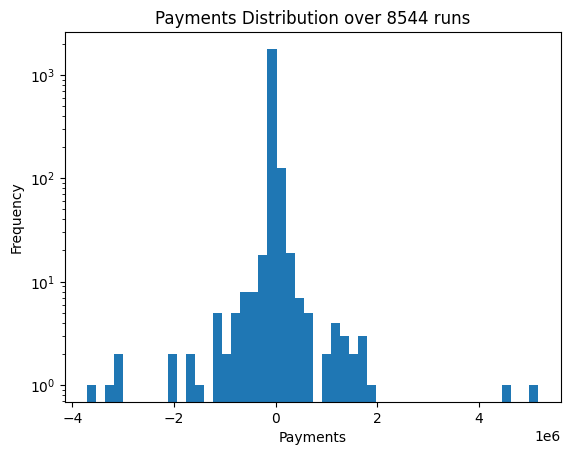

In [8]:
plt.hist(payments.sum(axis=0), bins=50)
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Payments Distribution over {} runs'.format(len(payments)))
plt.show()

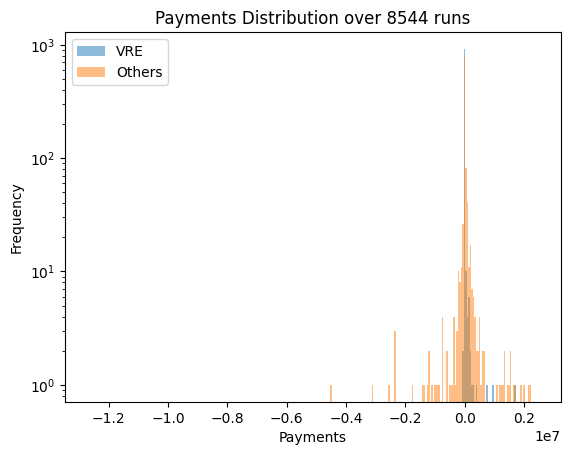

In [27]:
bins=np.arange(payments.sum(0).min(), payments.sum(0).max(), 50000)
VREslice, nonVREslice = [], []
for i in range(numGen):
    if genCos[i].isVRE:
        VREslice.append(i)
    else:
        nonVREslice.append(i)
plt.hist(payments[:, VREslice].sum(axis=0), bins=bins, alpha=0.5, label='VRE')
plt.hist(payments[:, nonVREslice].sum(axis=0), bins=bins, alpha=0.5, label='Others')
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Payments Distribution over {} runs'.format(len(payments)))
plt.legend()
plt.show()

In [28]:
payments[:, VREslice].sum(), payments[:, nonVREslice].sum()

(5901182.25787475, -5901415.039388371)

In [ ]:
Request URL:
https://www.iso-ne.com/isoexpress/web/reports/operations?p_p_id=operdataviewdetails_WAR_isoneoperdataviewportlet&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_cacheability=cacheLevelPage&p_p_col_id=column-2&p_p_col_count=1
Request Method:
POST
Status Code:
200 OK
Remote Address:
18.238.25.92:443
Referrer Policy:
strict-origin-when-cross-origin
Cache-Control:
max-age=3600, must-revalidate
Content-Disposition:
attachment; filename="historical.zip"
Content-Encoding:
Binary
Content-Type:
application/zip;charset=UTF-8
Date:
Wed, 21 Feb 2024 00:39:07 GMT
Referrer-Policy:
strict-origin-when-cross-origin
Server:
ISO New England

Server-Timing:
dtSInfo;desc="0", dtRpid;desc="-1427402212", dtTao;desc="1"
Set-Cookie:
AWSALB=NsHECO/VwaA6B/mq/ou6EnPgv0Fv70upHZDFQ7rA8bfCZW8veg1cnjOS/QEwIMN/GNxZHGeK4dUralcA3KmGO3OvzHF22fWLISNcN/2zu5BlMoyM5a1NCO/6U/ZVoVR9QEbfUKitdKKL1W7DIUjIQKgzxbZtLGBNEc8imZxCPw/Ah7T4w7ySZq9PDgu8rg==; Expires=Wed, 28 Feb 2024 00:39:06 GMT; Path=/
Set-Cookie:
AWSALBCORS=NsHECO/VwaA6B/mq/ou6EnPgv0Fv70upHZDFQ7rA8bfCZW8veg1cnjOS/QEwIMN/GNxZHGeK4dUralcA3KmGO3OvzHF22fWLISNcN/2zu5BlMoyM5a1NCO/6U/ZVoVR9QEbfUKitdKKL1W7DIUjIQKgzxbZtLGBNEc8imZxCPw/Ah7T4w7ySZq9PDgu8rg==; Expires=Wed, 28 Feb 2024 00:39:06 GMT; Path=/; SameSite=None; Secure
Strict-Transport-Security:
max-age=31536000; includeSubDomains; preload
Timing-Allow-Origin:
*
Via:
1.1 2ac244f3035dac54badc413a33e6e00c.cloudfront.net (CloudFront)
X-Amz-Cf-Id:
cedU1MJhLdqKcw_p1c4zfgsxh0jKtPdxQ4EJsnKH6wIEtdw4xzzb5Q==
X-Amz-Cf-Pop:
CMH68-P5
X-Cache:
Miss from cloudfront
X-Content-Type-Options:
nosniff
X-Frame-Options:
SAMEORIGIN
X-Xss-Protection:
1
:authority:
www.iso-ne.com
:method:
POST
:path:
/isoexpress/web/reports/operations?p_p_id=operdataviewdetails_WAR_isoneoperdataviewportlet&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_cacheability=cacheLevelPage&p_p_col_id=column-2&p_p_col_count=1
:scheme:
https
Accept:
application/json, text/javascript, */*
Accept-Encoding:
gzip, deflate, br
Accept-Language:
en-US,en;q=0.9
Content-Length:
476
Content-Type:
application/x-www-form-urlencoded; charset=UTF-8
Cookie:
JSESSIONID=E1F3EE375B15BC2413DAD896C02F803B; COOKIE_SUPPORT=true; GUEST_LANGUAGE_ID=en_US; nmstat=49029d15-b372-8c34-2282-63cea6f1a75f; visitor_id405752=1022537452; visitor_id405752-hash=4ab210f48405a4ccb06456a00ccd149c5034b1860ed9f547f626e38375bbc0de83e4e1cd8b412cd7a4c2073ac387445ee8a0f8ec; dtCookie=v_4_srv_3_sn_A02B7D620B9CD49A15D1F59192482DB8_perc_100000_ol_0_mul_1_app-3Aa1d4021633f8377b_1; _gid=GA1.2.1078157297.1708458449; rxVisitor=1708464013196LM9IQ7P1JQ7M7K44C212QK8U420DOM58; COMPANY_ID=10136; ID=634943577836795077663454644155422f6558556e413d3d; USER_UUID=5161494442484e657230676734666438716177664535526d3664364c524f45514f35335346576b507853493d; isox_token="8C7Vl2RfY4h/S49Vg4E5lYcfAGfy/S+CWLiP3rvk5pjXqYineAJYPgKT63zIUYSG43m7y0tKtI555aRc49hgHHuRfy1I58blzu5P4yfSdalmWE7c0VnNbsb82vesC4RxPv6u+Mbh1a78Lf3kawjqecaFBq8ybNwcrKuZprl/niA="; _ga=GA1.1.1525807522.1701963543; dtPC=3$268765867_885h-vFPTFOSVHELFCQUJJRHDPGKVHMBAKRPSR-0e0; rxvt=1708476016236|1708474216236; LFR_SESSION_STATE_10140=1708474364242; LFR_SESSION_STATE_2278384=1708474484238; dtSa=true%7CS%7C-1%7C-%7C-%7C1708474894336%7C268765867_885%7Chttps%3A%2F%2Fwww.iso-ne.com%2Fabout%2Fkey-stats%2Fresource-mix%2F%7C%7C%7C%7C; _ga_PE4F6Q8NST=GS1.1.1708474669.26.1.1708474906.0.0.0; AWSALB=r+jKj/c8Z5mdl5d9EXWTkF3bWWwxoMwOWIl4cPtViz1KHLNx9kpRBFuK1uBZS/n4GqK+ZVhm71QC6Fb3aQulb1JOmg9SnDrsC9eu5PjgOZS3EtDOTJemBzRKajlckQUasmj4EL/0cnVjABDBzWyWmDve/WoB5KL5HoD6aS0MmfTZEXR5sm5d02PvO8P4vA==; AWSALBCORS=r+jKj/c8Z5mdl5d9EXWTkF3bWWwxoMwOWIl4cPtViz1KHLNx9kpRBFuK1uBZS/n4GqK+ZVhm71QC6Fb3aQulb1JOmg9SnDrsC9eu5PjgOZS3EtDOTJemBzRKajlckQUasmj4EL/0cnVjABDBzWyWmDve/WoB5KL5HoD6aS0MmfTZEXR5sm5d02PvO8P4vA==
Origin:
https://www.iso-ne.com
Referer:
https://www.iso-ne.com/isoexpress/web/reports/operations/-/tree/gen-fuel-mix
Sec-Ch-Ua:
"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"
Sec-Ch-Ua-Mobile:
?0
Sec-Ch-Ua-Platform:
"Linux"
Sec-Fetch-Dest:
empty
Sec-Fetch-Mode:
cors
Sec-Fetch-Site:
same-origin
User-Agent:
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36
X-Requested-With:
XMLHttpRequest